**Mission Briefing: Operation Clean Air**


**Spatial aggregation.**

Q1.Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = r"\Data.csv"
df = pd.read_csv(file_path)
df.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['date'] = pd.to_datetime(df['Timestamp'])
df = df.dropna(subset=['PM2.5'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728348 entries, 6 to 1627460
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  728348 non-null  object        
 1   station    728348 non-null  object        
 2   PM2.5      728348 non-null  float64       
 3   PM10       676487 non-null  float64       
 4   address    588447 non-null  object        
 5   city       728348 non-null  object        
 6   latitude   728348 non-null  float64       
 7   longitude  728348 non-null  float64       
 8   state      728348 non-null  object        
 9   date       728348 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 61.1+ MB


In [4]:
df.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,date
6,2017-01-01,"Alandur Bus Depot, Chennai - CPCB",43.401979,NaN,"MKN Rd, St Thomas Mount, Chennai, Tamil Nadu 6...",Chennai,12.909916,80.107654,Tamil Nadu,2017-01-01
10,2017-01-01,"Anand Vihar, Delhi - DPCC",199.514167,360.567708,NaN,Delhi,28.647622,77.315809,Delhi,2017-01-01
13,2017-01-01,"Ardhali Bazar, Varanasi - UPPCB",166.322111,213.937000,"Ordali Bazar, Tagore Town, Orderly Bazar, Vara...",Varanasi,25.350599,82.908307,Uttar Pradesh,2017-01-01
23,2017-01-01,"BTM Layout, Bengaluru - CPCB",26.065000,NaN,NaN,Bengaluru,12.913522,77.595080,Karnataka,2017-01-01
24,2017-01-01,"BWSSB Kadabesanahalli, Bengaluru - CPCB",19.536087,NaN,NaN,Bengaluru,12.935205,77.681449,Karnataka,2017-01-01


In [5]:
avg_pm25_state = df.groupby('state')['PM2.5'].mean()
highest_pm25_state = avg_pm25_state.idxmax()
highest_pm25_value = avg_pm25_state.max()
print(f"State with higest average PM2.5: {highest_pm25_state} ({highest_pm25_value:.1f} ug/m^3)")


State with higest average PM2.5: Delhi (104.1 ug/m^3)


Q2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [6]:
year_2023 = df[df['date'].dt.year==2023]
harmful_days_2023 = year_2023[year_2023['PM2.5'] > 300].groupby('state')['date'].count()
hazardous_state = harmful_days_2023.idxmax()
hazardous_days = harmful_days_2023.max()
print(f"State with most hazardous PM2.5 days in 2023: {hazardous_state} ({hazardous_days} days)")

State with most hazardous PM2.5 days in 2023: Delhi (470 days)


Q3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)


In [7]:
pm25_variability = year_2023.groupby('state')['PM2.5'].std()
variable_state = pm25_variability.idxmax()
highest_var = pm25_variability.max()
print(f"State with highest PM2.5 variability in 2023 is: {variable_state} (Standard Deviation: {highest_var: .1f} ug/m^3)")

State with highest PM2.5 variability in 2023 is: Delhi (Standard Deviation:  82.8 ug/m^3)


Q4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?


In [8]:
covid_period = df[df['date'].dt.year.isin([2020,2021])]
state_avg = covid_period.groupby('state')['PM2.5'].mean()
lowest_avg_state = state_avg.idxmin()
lowest_avg_value = state_avg.min()
print(f"State with lowest average PM2.5 during covid period: {lowest_avg_state} - {lowest_avg_value:.1f} up/m^3")

State with lowest average PM2.5 during covid period: Mizoram - 14.3 up/m^3


**Temporal Aggregation**

Q1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [9]:
aug_2020 = df[(df['date'].dt.year == 2020) & (df['date'].dt.month == 8)]
max_pm25_row = aug_2020.loc[aug_2020['PM2.5'].idxmax()]
max_pm25_station = max_pm25_row['station']
max_pm25_value = max_pm25_row['PM2.5']
print(f"Station that recorded the highest value of PM 2.5 for the month Aug of 2020: {max_pm25_station} with a PM2.5 level of {max_pm25_value}.")

Station that recorded the highest value of PM 2.5 for the month Aug of 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with a PM2.5 level of 805.51.


Q2.For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.


In [10]:
data_2018 = df[(df['date'].dt.year == 2018)]
station = data_2018[(data_2018['station'] == ' Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')]
Winter = station[(station['date'].dt.month == 12) | (station['date'].dt.month <= 2)]
Summer = station[(station['date'].dt.month == 3) & (station['date'].dt.month <= 5)]
Monsoon = station[(station['date'].dt.month == 6) & (station['date'].dt.month <= 9)]

avg_winter_pm25 = Winter['PM2.5'].mean()
avg_summer_pm25 = Summer['PM2.5'].mean()
avg_monsoon_pm25 = Monsoon['PM2.5'].mean()

season_avg = {
    'Winter': avg_winter_pm25,
    'summer': avg_summer_pm25,
    'monsoon': avg_monsoon_pm25
}
highest_pollation_season = max(season_avg, key=season_avg.get)
highest_pollation_vallue = season_avg[highest_pollation_season]

for season, avg in season_avg.items():
    print(f'{season}: {avg} µg/m³')

print(f'season with highest pollution is {highest_pollation_season} with average PM2.5 concentration of {highest_pollation_vallue} µg/m³')

Winter: nan µg/m³
summer: nan µg/m³
monsoon: nan µg/m³
season with highest pollution is Winter with average PM2.5 concentration of nan µg/m³


[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


Pollution levels vary across seasons due to environmental and human factors. In winter, temperature inversions trap pollutants close to the ground, worsening air quality. Additionally, increased biomass burning from stubble burning and the use of wood or coal for heating releases large amounts of particulate matter. Reduced wind speed and stagnant air further prevent pollutant dispersion, making conditions worse. Conversely, summer often experiences better air quality due to stronger winds and convection currents that help disperse pollutants. However, in some regions, high temperatures can increase ozone formation, contributing to summer smog.

Q3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
Calculate the monthly average PM2.5 for weekdays and weekends separately
X-axis: Months (January to December).
Y-axis: Average PM2.5 levels.
Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.


C:\Users\priya\AppData\Local\Temp\ipykernel_20948\1126707887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['Day_of_Week'] = station['date'].dt.dayofweek
C:\Users\priya\AppData\Local\Temp\ipykernel_20948\1126707887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['Day_Type'] = station['Day_of_Week'].apply(lambda x: 'Weekday' if x <= 5 else 'Weekend')
C:\Users\priya\AppData\Local\Temp\ipykernel_20948\1126707887.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

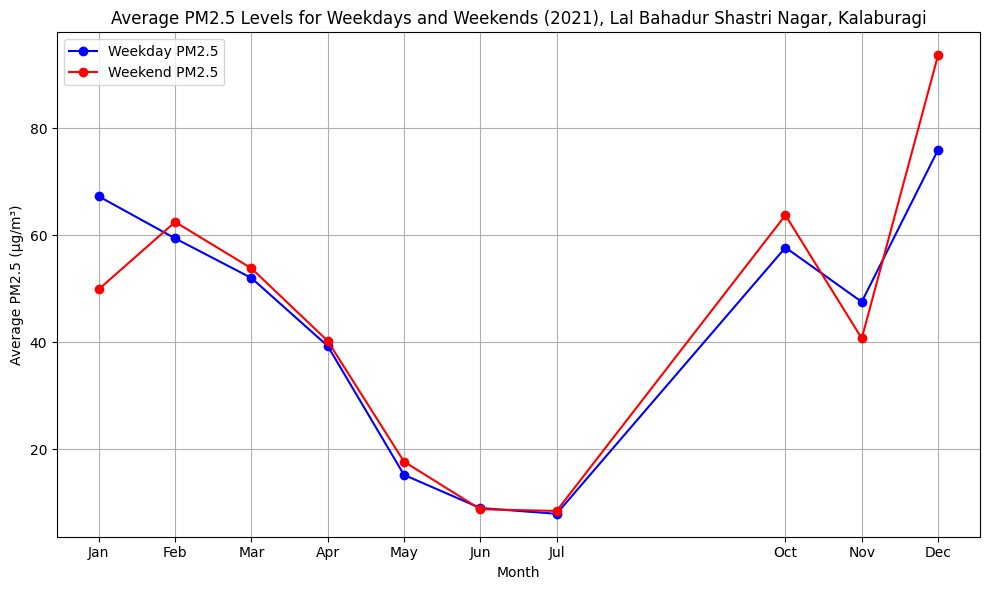

In [11]:
data_2021 = df[df['date'].dt.year == 2021]
station = data_2021[data_2021['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
station['Day_of_Week'] = station['date'].dt.dayofweek

station['Day_Type'] = station['Day_of_Week'].apply(lambda x: 'Weekday' if x <= 5 else 'Weekend')

station['Month'] = station['date'].dt.month
monthly_avg = station.groupby(['Month', 'Day_Type'])['PM2.5'].mean().unstack()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['Weekday'], label='Weekday PM2.5', marker='o', color='blue')
plt.plot(monthly_avg.index, monthly_avg['Weekend'], label='Weekend PM2.5', marker='o', color='red')

plt.xlabel('Month')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.title('Average PM2.5 Levels for Weekdays and Weekends (2021), Lal Bahadur Shastri Nagar, Kalaburagi')
plt.xticks(monthly_avg.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Oct', 'Nov', 'Dec'])
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

**Spatio-Temporal aggregation**

Q1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?


In [12]:
year_2022 = df[df['date'].dt.year == 2022]
summer_month = [3,4,5]
monsoon_month = [6,7,8,9]

year_2022['season'] = year_2022['date'].dt.month.map(lambda x: 'Summer' if x in summer_month else ('Monsoon' if x in monsoon_month else None))
year_2022 = year_2022.dropna(subset=['season'])
state_season = year_2022.groupby(['state','season'])['PM2.5'].mean().unstack()
state_season['percentage_change'] = ((state_season['Monsoon']-state_season['Summer'])/state_season['Summer'])*100
high_diff_state = state_season['percentage_change'].abs().idxmax()
highest_diff = state_season.loc[high_diff_state, 'percentage_change']
print(f"The state which has most difference (increase or decrease in PM2.5 levels is {high_diff_state} with a {highest_diff: .2f}% change.")

The state which has most difference (increase or decrease in PM2.5 levels is Assam with a -61.18% change.


C:\Users\priya\AppData\Local\Temp\ipykernel_20948\3620519378.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022['season'] = year_2022['date'].dt.month.map(lambda x: 'Summer' if x in summer_month else ('Monsoon' if x in monsoon_month else None))


Q2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

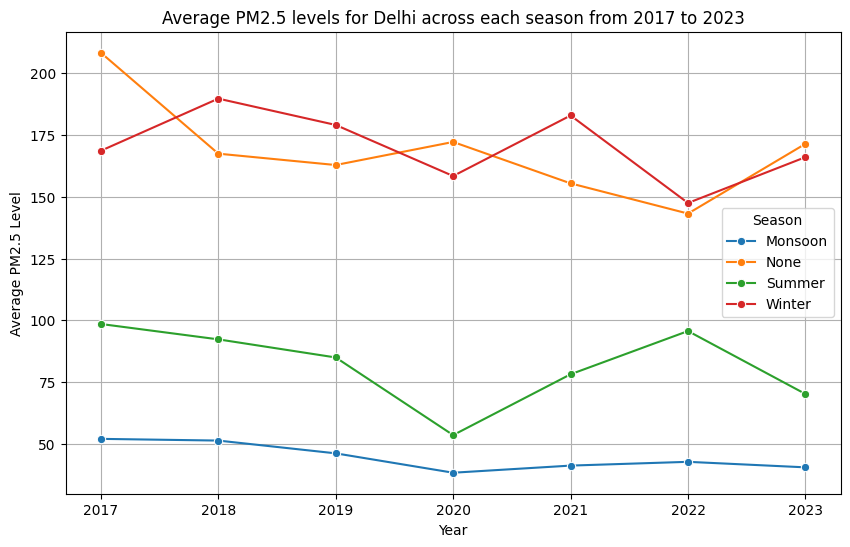

In [13]:
df['date'] = pd.to_datetime(df['Timestamp'])
delhi_df = df[df['city']=='Delhi'].copy()
delhi_df=delhi_df.dropna(subset=['PM2.5'])
delhi_df['Year'] = delhi_df['date'].dt.year
delhi_df['Month'] = delhi_df['date'].dt.month
delhi_df = delhi_df[(delhi_df['Year'] >= 2017) & (delhi_df['Year']<=2023)]

def get_seasons(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Summer'
    elif month in [6,7,8,9]:
        return 'Monsoon'
    else:
        return 'None'

delhi_df['Season'] = delhi_df['Month'].apply(get_seasons)
season_pm25 = delhi_df.groupby(['Year','Season'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=season_pm25, x='Year', y='PM2.5',hue='Season',marker='o')
plt.title('Average PM2.5 levels for Delhi across each season from 2017 to 2023')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.legend(title='Season')
plt.grid(True)
plt.show()

**Observed Seasonal Variation in PM2.5 Levels for Delhi (2017-2023)**:
Winter (December-February) → Highest Pollution Levels
PM2.5 levels peak during winter across all years.
This is due to low temperatures, fog, and temperature inversion, which trap pollutants close to the ground.
Increased use of biomass burning, industrial emissions, and firecrackers (especially during Diwali in November-December) further worsens air quality.


Q3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


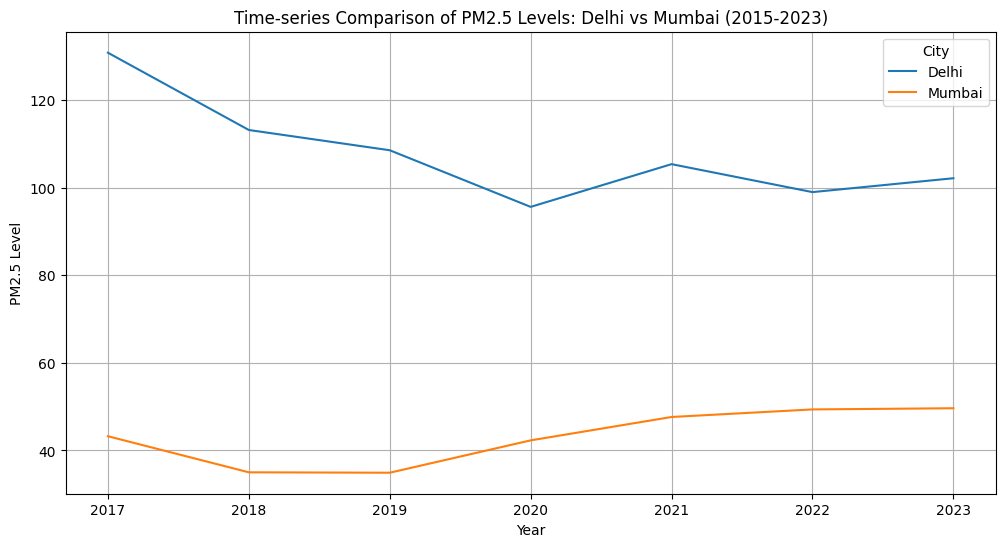

In [14]:
cities = ['Delhi','Mumbai']
filtered_df = df[df['city'].isin(cities)].copy()
filtered_df = filtered_df.dropna(subset=['PM2.5'])
filtered_df['Year'] = filtered_df['date'].dt.year
filtered_df = filtered_df[(filtered_df['Year']>=2015) & (filtered_df['Year']<=2023)]
time_series =  filtered_df.groupby(['Year', 'city'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=time_series, x='Year',y='PM2.5', hue='city')
plt.title('Time-series Comparison of PM2.5 Levels: Delhi vs Mumbai (2015-2023)')
plt.xlabel('Year')
plt.ylabel('PM2.5 Level')
plt.legend(title='City')
plt.grid(True)
plt.show()

Fluctuation refers to the degree of variation in PM2.5 levels over time. A city with more fluctuations will have larger and more frequent changes in pollution levels rather than a steady trend.
Here Delhi is seen to have more fluctuations.

**Population-Based**

Q1. Which state in India has the highest number of monitoring stations relative to its population? 


In [15]:
population_data = {
    'State': ["Uttar Pradesh", "Maharashtra", "Bihar", "West Bengal", "Madhya Pradesh", "Tamil Nadu", "Rajasthan",
        "Karnataka", "Gujarat", "Andhra Pradesh", "Odisha", "Telangana", "Kerala", "Jharkhand", "Assam",
        "Punjab", "Chhattisgarh", "Delhi", "Haryana", "Jammu and Kashmir", "Uttarakhand", "Himachal Pradesh",
        "Tripura", "Manipur", "Meghalaya", "Nagaland", "Arunachal Pradesh", "Puducherry", "Mizoram", "Chandigarh", "Sikkim"
    ],
    'Population': [
        199812341, 112374333, 104099452, 91276115, 72626809, 72147030, 68548437, 61095297, 60439692,
        49577103, 41974219, 35003674, 33406061, 32988134, 31205576, 27743338, 25545198, 16787941,
        25351462, 12267032, 10086292, 6864602, 3673917, 2570390, 2966889, 1978502, 1383727, 1247953,
        1097206, 1055450, 610577
    ]
}
population_df = pd.DataFrame(population_data)
stations_per_state = df.groupby('state')['station'].nunique().reset_index()
stations_per_state.columns = ['State','Monitoring_Stations']

merged_df = pd.merge(stations_per_state, population_df, on='State', how='inner')
merged_df['Stations_per_million'] = merged_df['Monitoring_Stations']/(merged_df['Population']/1e6)
highest_ratio_state = merged_df.loc[merged_df['Stations_per_million'].idxmax()]
print(f"The state in India has the highest number of monitoring stations relative to its population is {highest_ratio_state}")
        

The state in India has the highest number of monitoring stations relative to its population is State                   Chandigarh
Monitoring_Stations              3
Population                 1055450
Stations_per_million       2.84239
Name: 4, dtype: object


In [16]:
df.rename(columns={'state':'State'},inplace=True)

Q2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.


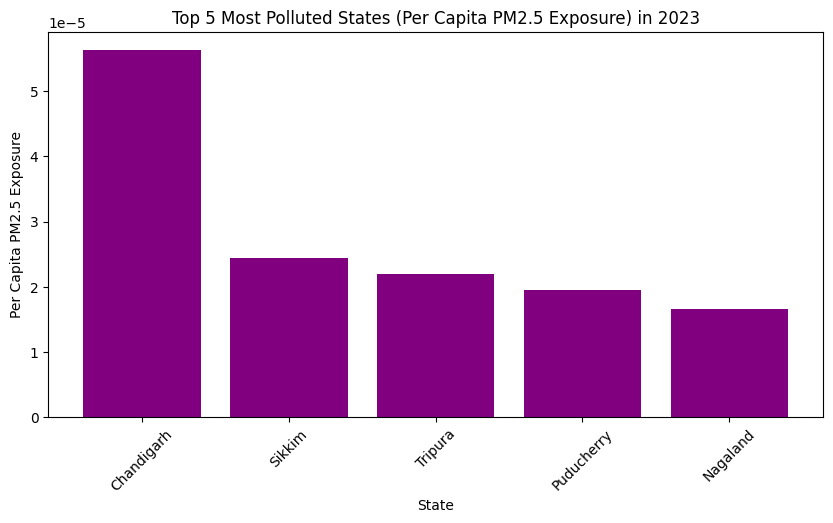

In [17]:
df_state = pd.DataFrame(population_data)
df['date']=pd.to_datetime(df['Timestamp'])
year_2023 = df[df['date'].dt.year == 2023]
df_pm25 = year_2023.groupby('State')['PM2.5'].mean().reset_index()
df_merged = df_pm25.merge(df_state, on='State',how='inner')
df_merged['Per Capita PM2.5'] = df_merged['PM2.5']/df_merged['Population']
df_top5 = df_merged.nlargest(5,'Per Capita PM2.5')

plt.figure(figsize=(10,5))
plt.bar(df_top5['State'],df_top5['Per Capita PM2.5'], color='Purple')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States (Per Capita PM2.5 Exposure) in 2023')
plt.xticks(rotation=45)
plt.show()

Q3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.


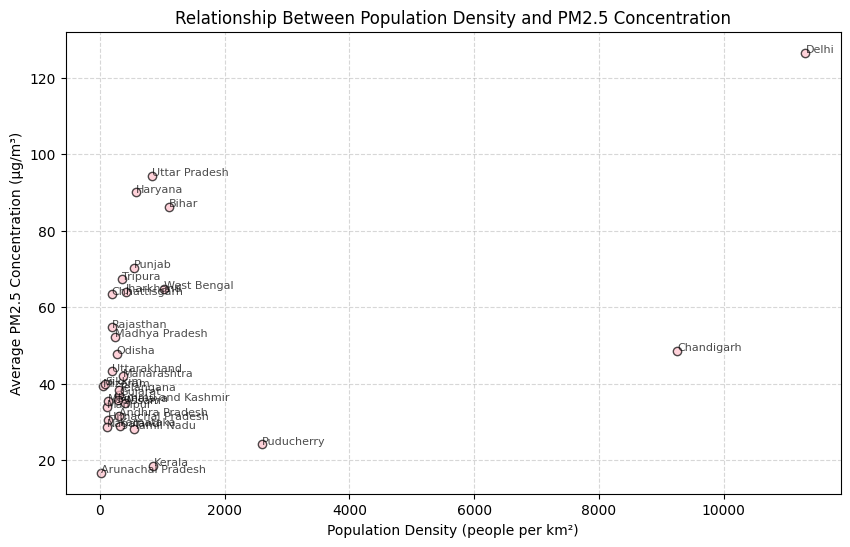

In [18]:
states = [
    "Uttar Pradesh", "Maharashtra", "Bihar", "West Bengal", "Madhya Pradesh",
    "Tamil Nadu", "Rajasthan", "Karnataka", "Gujarat", "Andhra Pradesh",
    "Odisha", "Telangana", "Kerala", "Jharkhand", "Assam", "Punjab",
    "Chhattisgarh", "Delhi", "Haryana", "Jammu and Kashmir", "Uttarakhand",
    "Himachal Pradesh", "Tripura", "Manipur", "Meghalaya", "Nagaland",
    "Arunachal Pradesh", "Puducherry", "Mizoram", "Chandigarh", "Sikkim"
]

population = [
    199812341, 112374333, 104099452, 91276115, 72626809, 72147030, 68548437,
    61095297, 60439692, 49577103, 41974219, 35003674, 33406061, 32988134,
    31205576, 27743338, 25545198, 16787941, 25351462, 12267032, 10086292,
    6864602, 3673917, 2570390, 2966889, 1978502, 1383727, 1247953, 1097206,
    1055450, 610577
]

area = [
    240928, 307713, 94163, 88752, 308252, 130058, 342239, 191791, 196024,
    162975, 155707, 112077, 38863, 79716, 78438, 50362, 135192, 1484, 44212,
    42241, 53483, 55673, 10491, 22327, 22429, 16579, 83743, 479, 21081, 114, 7096
]

pm25 = [
    94.4, 41.9, 86.2, 64.8, 52.3, 28.2, 54.7, 29.0, 37.1, 31.6, 47.8, 38.2,
    18.5, 64.0, 34.9, 70.3, 63.3, 126.5, 90.1, 35.6, 43.2, 30.6, 67.3, 33.8,
    35.4, 28.7, 16.7, 24.2, 39.4, 48.6, 39.8
]
pop_density = [pop/ar for pop,ar in zip(population,area)]
plt.figure(figsize=(10,6))
plt.scatter(pop_density,pm25, color='pink',alpha=0.7,edgecolor='k')
plt.xlabel("Population Density (people per km²)")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.title("Relationship Between Population Density and PM2.5 Concentration")

for i,state in enumerate(states):
    plt.annotate(state, (pop_density[i], pm25[i]), fontsize=8, alpha=0.7)
plt.grid(True, linestyle = '--', alpha=0.5)
plt.show()

**Conclusion on the Correlation Between Population Density and Pollution (PM2.5 Concentration):**
From the scatter plot, we can observe a positive correlation between population density and PM2.5 concentration. This means that as population density increases, pollution levels (PM2.5) also tend to be higher.

**Area Based**

Q1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


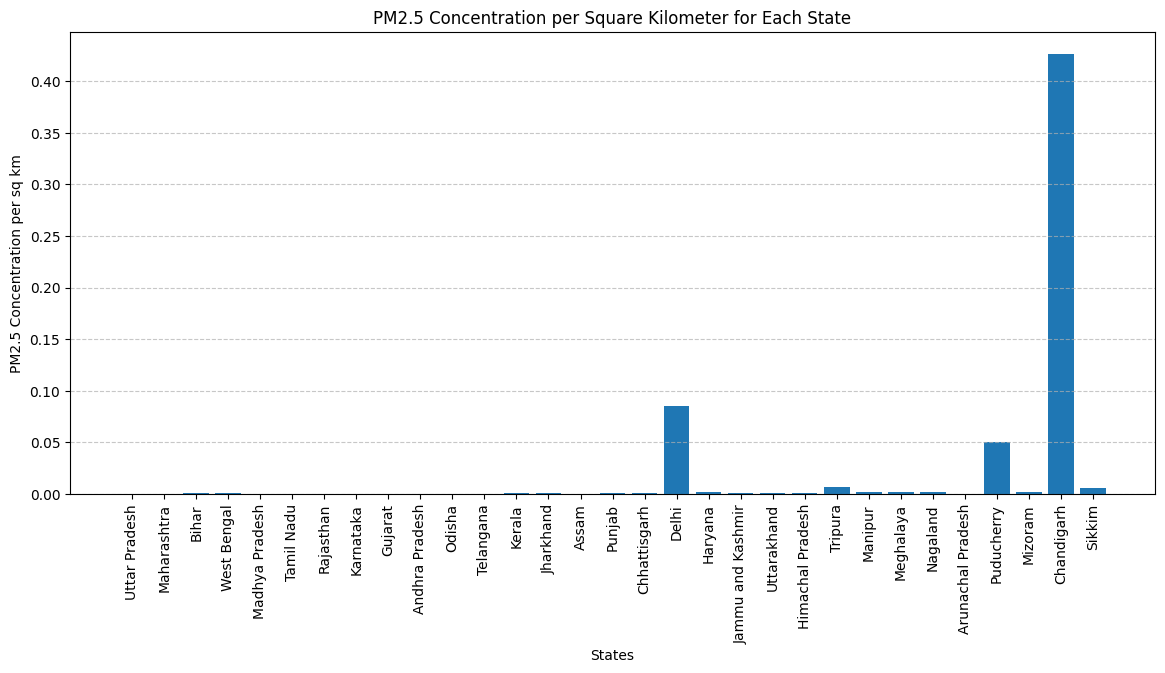

The state with the highest PM2.5 concentration per square kilometer is Chandigarh.


In [19]:
pm25_per_sqkm = np.array(pm25)/np.array(area)
max_index = np.argmax(pm25_per_sqkm)
most_polluted_state = states[max_index]

plt.figure(figsize=(14,6))
plt.bar(states, pm25_per_sqkm)
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("PM2.5 Concentration per sq km")
plt.title("PM2.5 Concentration per Square Kilometer for Each State")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print(f"The state with the highest PM2.5 concentration per square kilometer is {most_polluted_state}.")

Q2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


State with the highest density of monitoring stations: Delhi


C:\Users\priya\AppData\Local\Temp\ipykernel_20948\2859899552.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='station', data=stations_each_state, palette='viridis')


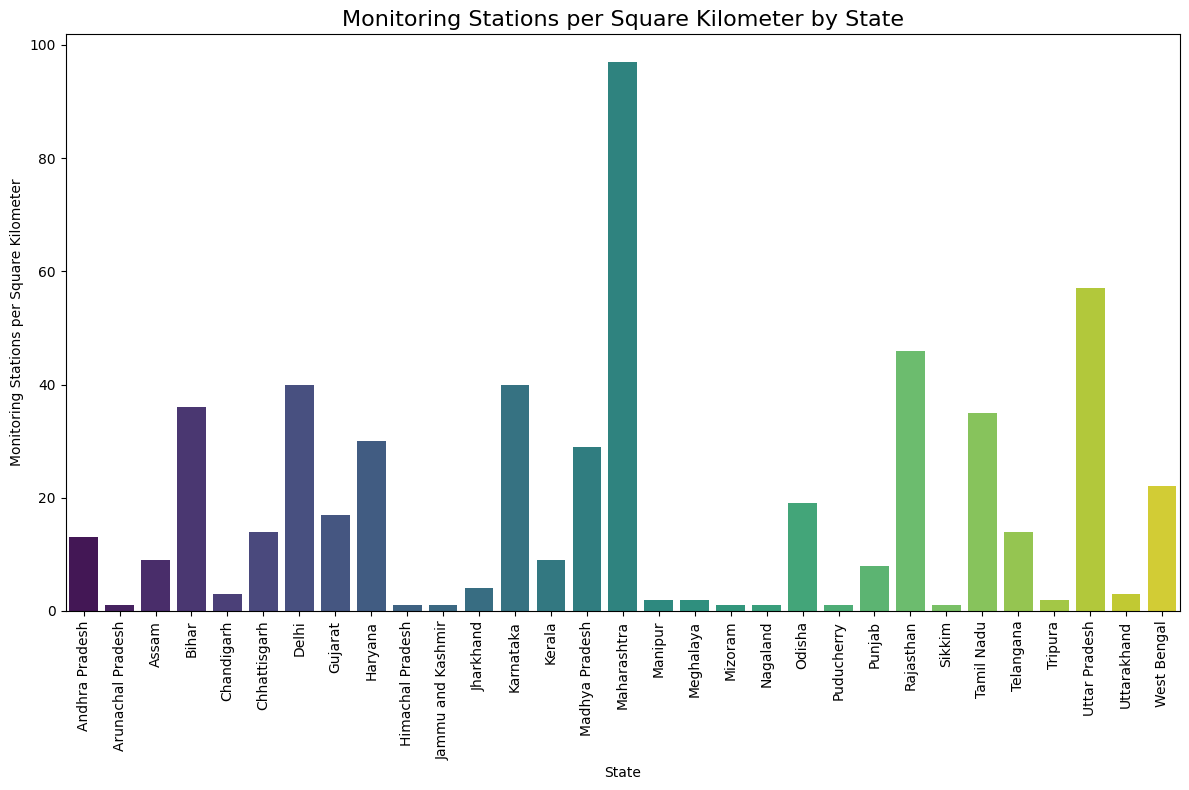

In [ ]:
path=r"State_data.csv"
state_data=pd.read_csv(path)
stations_each_state = df.groupby('State')['station'].nunique().reset_index()
stations_each_state['stations_per_sq_km'] = stations_each_state['station'] / state_data.groupby('State')['Area (km2)'].first().reset_index()['Area (km2)']
highest_density_state = stations_each_state.loc[stations_each_state['stations_per_sq_km'].idxmax()]
print(f"State with the highest density of monitoring stations: {highest_density_state['State']}")

plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='station', data=stations_each_state, palette='viridis')

plt.title('Monitoring Stations per Square Kilometer by State', fontsize=16)
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Monitoring Stations per Square Kilometer')
plt.tight_layout()
plt.show()

Q3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


In [21]:
merged_data_2021 = pd.merge(state_data, df, how='inner')
maharashtra_data = merged_data_2021[merged_data_2021['State']=='Maharashtra']
mp_data = merged_data_2021[merged_data_2021['State'] == 'Madhya Pradesh']
mh_pm25= maharashtra_data['PM2.5'].mean()
mp_pm25 = mp_data['PM2.5'].mean()
mh_density=maharashtra_data['Population'].iloc[0]/maharashtra_data['Area (km2)'].iloc[0]
mp_density=mp_data['Population'].iloc[0]/mp_data['Area (km2)'].iloc[0]
print(f"Average PM2.5 in Maharashtra: {mh_pm25} µg/m³")
print(f"Average PM2.5 in Madhya Pradesh: {mp_pm25} µg/m³")
print(f"Population Density in Maharashtra: {mh_density} people per km²")
print(f"Population Density in Madhya Pradesh: {mp_density} people per km²")

Average PM2.5 in Maharashtra: 43.4914149422534 µg/m³
Average PM2.5 in Madhya Pradesh: 45.87437459349826 µg/m³
Population Density in Maharashtra: 365.1920230864474 people per km²
Population Density in Madhya Pradesh: 235.60855728429985 people per km²


**Funding Based**

Q1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.


In [22]:
data_2021 = df[df['date'].dt.year==2021]
paths=r"D:\Assignment 3\NCAP_Funding.csv"
ncap_data = pd.read_csv(paths)
ncap_data['Amount released during FY 2021-22'] = pd.to_numeric(ncap_data['Amount released during FY 2021-22'], errors='coerce')
ncap_data['Received_Funding_2021'] = ncap_data['Amount released during FY 2021-22'].apply(lambda x: x >= 0)
ncap_funded_states = ['Received_Funding_2021']
merged_data = pd.merge(data_2021, state_data, left_on='State', right_on='State')
funded_data = merged_data[merged_data['State'].isin(ncap_funded_states)]
nonfunded_data = merged_data[~merged_data['State'].isin(ncap_funded_states)]
avg_pm25_ncap = funded_data['PM2.5'].mean()
avg_pm25_nonfunded = nonfunded_data['PM2.5'].mean()
print(f"Average PM2.5 in NCAP funded states in 2021: {avg_pm25_ncap}")
print(f"Average PM2.5 in non-NCAP funded states in 2021: {avg_pm25_nonfunded}")

Average PM2.5 in NCAP funded states in 2021: nan
Average PM2.5 in non-NCAP funded states in 2021: 61.77704484168887


Q2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


C:\Users\priya\AppData\Local\Temp\ipykernel_20948\1406109090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_data['year'] = df['date'].dt.year
C:\Users\priya\AppData\Local\Temp\ipykernel_20948\1406109090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_data['PM2.5']=df['PM2.5']


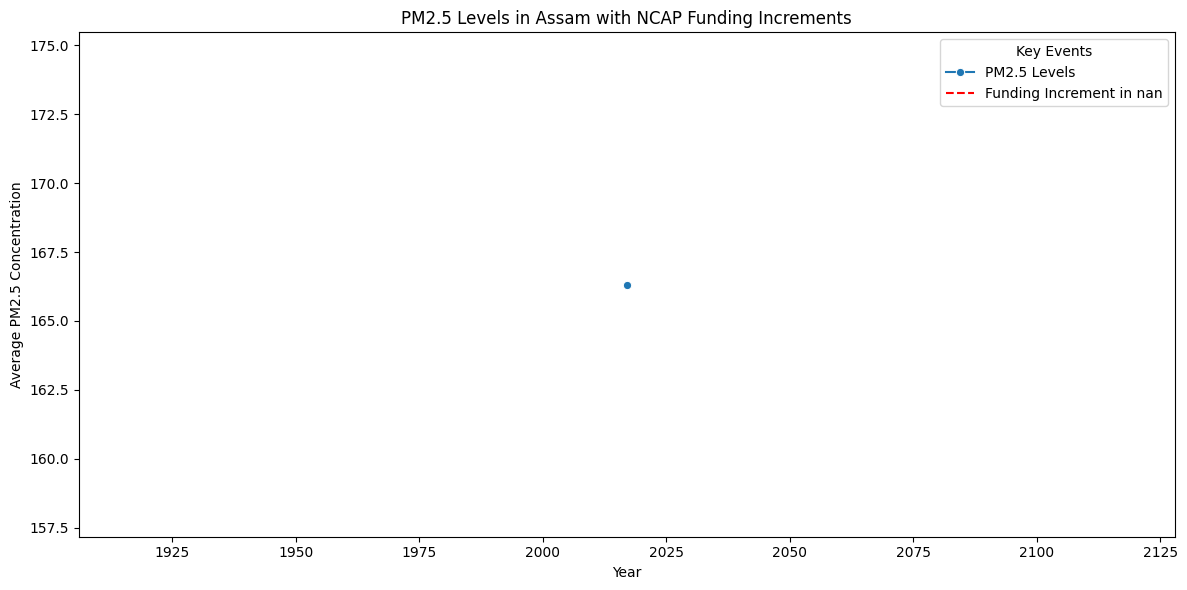

In [23]:
assam_data = ncap_data[ncap_data['State'] == 'Assam']
assam_funding = assam_data['Amount released during FY 2021-22'].unique()
assam_data['year'] = df['date'].dt.year
assam_data['PM2.5']=df['PM2.5']
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='PM2.5', data=assam_data, marker='o', label='PM2.5 Levels')

for funding_year in assam_funding:
    plt.axvline(x=funding_year, color='r', linestyle='--', label=f'Funding Increment in {funding_year}')

plt.title('PM2.5 Levels in Assam with NCAP Funding Increments')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Concentration')
plt.legend(title='Key Events')

plt.tight_layout()
plt.show()

Q3.Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


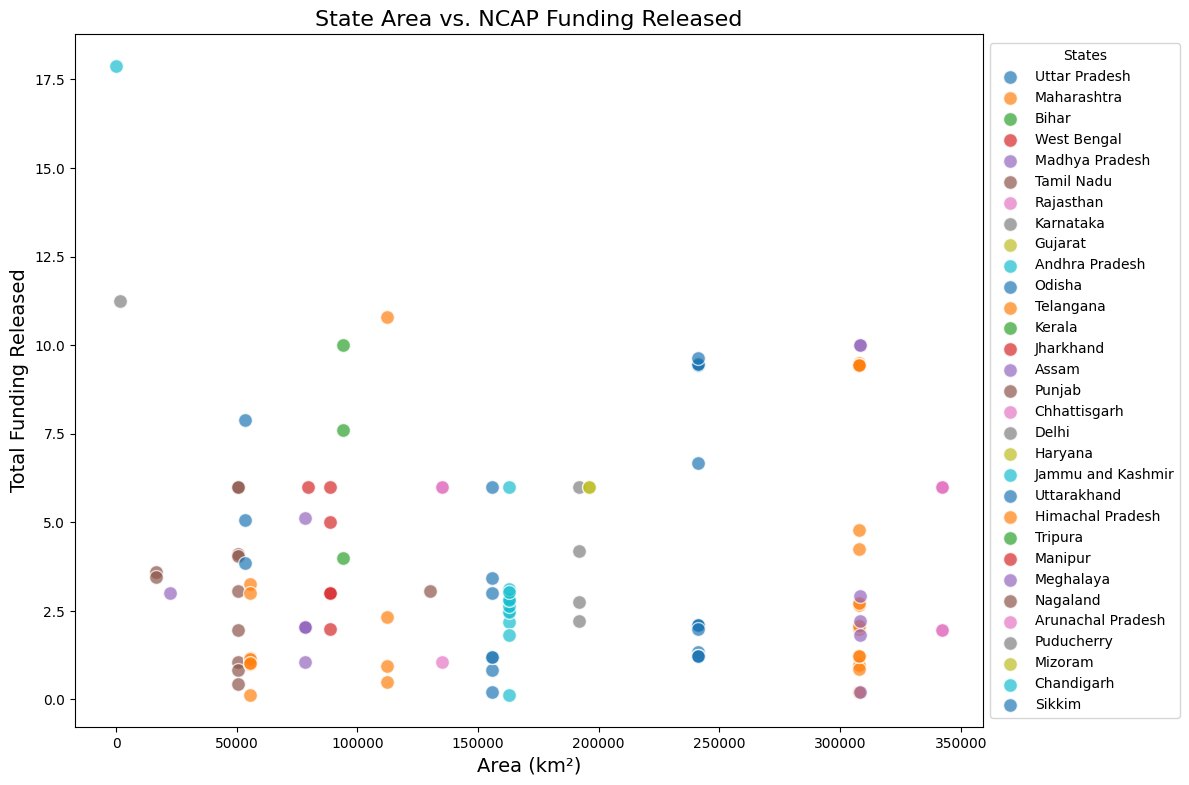

In [24]:
merged_data = pd.merge(state_data, ncap_data[['State','Total fund released']], on='State', how='left')
plt.figure(figsize=(12, 8))
for i, state in enumerate(merged_data['State'].unique()):
    state_data_filtered = merged_data[merged_data['State'] == state]
    plt.scatter(state_data_filtered['Area (km2)'], state_data_filtered['Total fund released'], label=state, alpha=0.7, edgecolors='w', s=100)
plt.title('State Area vs. NCAP Funding Released', fontsize=16)
plt.xlabel('Area (km²)', fontsize=14)
plt.ylabel('Total Funding Released', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='States', fontsize=10)


plt.tight_layout()
plt.show()

**Miscellaneous Questions**

Q1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [25]:
df_2023 = df[df['date'].dt.year==2023]
city_avg_pm25 = df_2023.groupby("city")["PM2.5"].mean().dropna()
most_polluted_city = city_avg_pm25.idxmax()
highest_avg_pm25 = city_avg_pm25.max()
most_polluted_city, highest_avg_pm25


('Darbhanga', np.float64(242.91703203305738))

In [26]:
darbhanga_2023 = df_2023[df_2023["city"] == most_polluted_city]
daily_pm25 = darbhanga_2023.groupby(darbhanga_2023["date"].dt.date)["PM2.5"].mean()
hazardous_days = (daily_pm25 > 300).sum()
total_days = daily_pm25.count()
hazardous_percentage = (hazardous_days / total_days) * 100
hazardous_days, total_days, hazardous_percentage

(np.int64(3), np.int64(13), np.float64(23.076923076923077))

Q2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

C:\Users\priya\AppData\Local\Temp\ipykernel_20948\4161561922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['date'] = pd.to_datetime(delhi_data['date'])
C:\Users\priya\AppData\Local\Temp\ipykernel_20948\4161561922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['month'] = delhi_data['date'].dt.month
C:\Users\priya\AppData\Local\Temp\ipykernel_20948\4161561922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

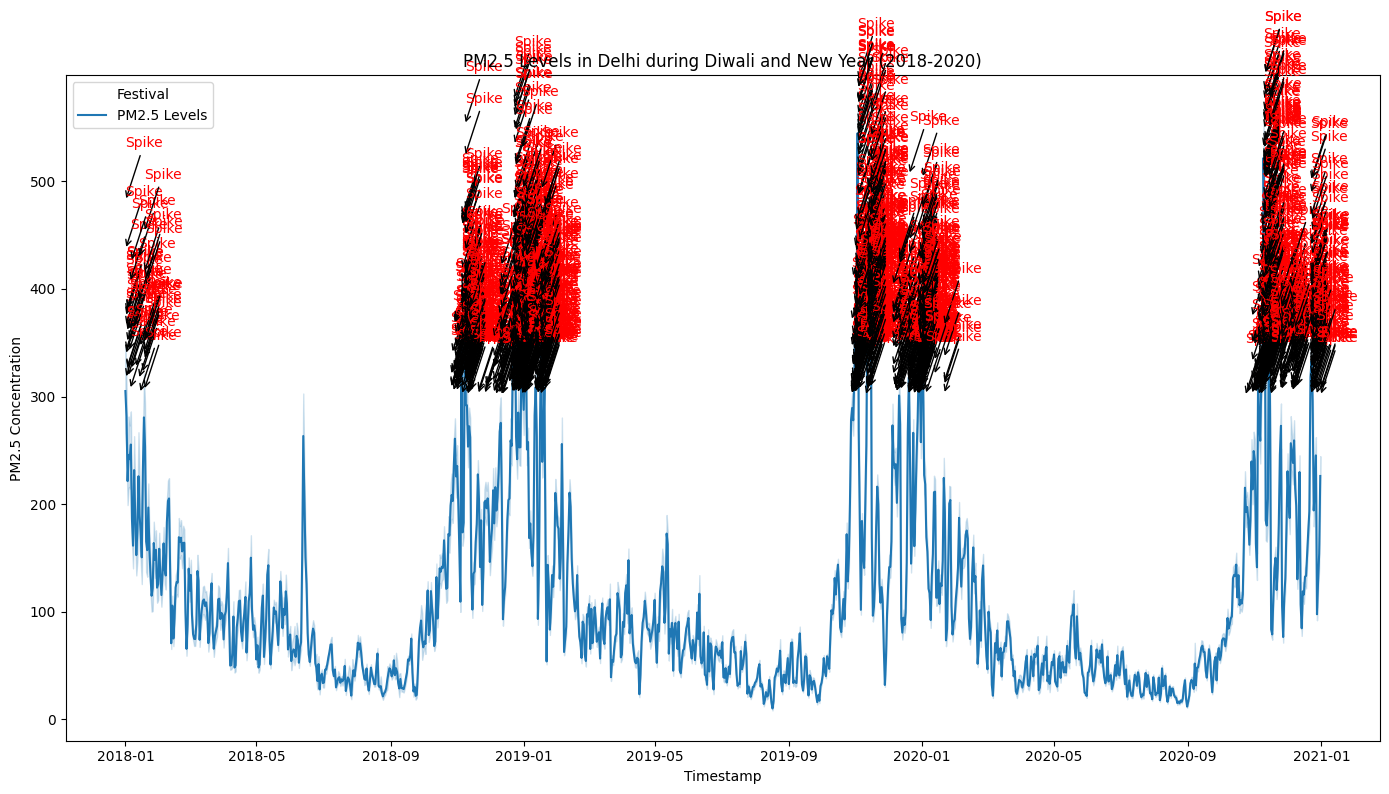

In [27]:
df['year'] = df['date'].dt.year
delhi_data = df[(df['State'] == 'Delhi') & (df['year'].between(2018, 2020))]
delhi_data['date'] = pd.to_datetime(delhi_data['date'])
delhi_data['month'] = delhi_data['date'].dt.month
delhi_data['festival'] = 'Regular' 
delhi_data.loc[delhi_data['month'].isin([10, 11]), 'festival'] = 'Diwali'
delhi_data.loc[delhi_data['month'].isin([12, 1]), 'festival'] = 'New Year'

plt.figure(figsize=(14, 8))
sns.lineplot(x='date', y='PM2.5', data=delhi_data, label='PM2.5 Levels')

threshold = 300
spikes = delhi_data[delhi_data['PM2.5'] > threshold]
for _, spike in spikes.iterrows():
    if spike['festival'] in ['Diwali', 'New Year']:
        plt.annotate(
            'Spike', 
            xy=(spike['date'], spike['PM2.5']),
            xytext=(spike['date'], spike['PM2.5'] + 50),  
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            fontsize=10,
            color='red'
        )

plt.title('PM2.5 Levels in Delhi during Diwali and New Year (2018-2020)')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 Concentration')
plt.legend(title='Festival')
plt.tight_layout()

plt.show()

Q3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

The state that received the highest NCAP funding in 2020 is Assam.


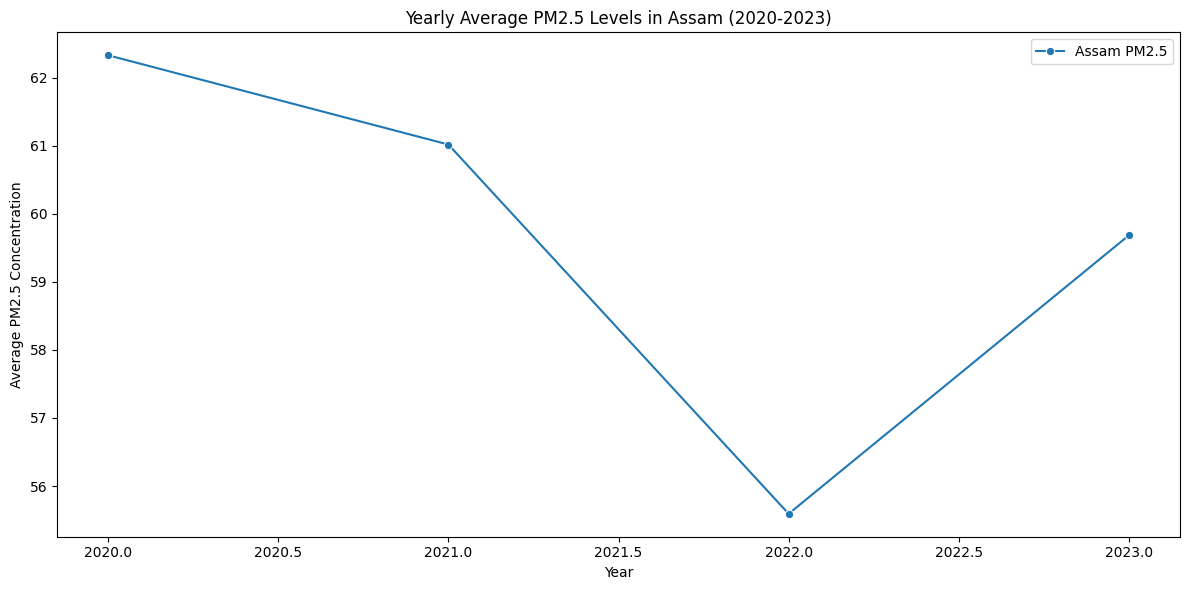

PM2.5 levels in Assam in 2020: 62.32940962902694 µg/m³
PM2.5 levels in Assam in 2023: 59.685088034683645 µg/m³
Improvement in PM2.5 levels: 2.644321594343296 µg/m³


In [28]:

df['year'] = df['date'].dt.year
ncap_funding_2020 = df[df['year'] == 2020]


ncap_funding_2020 = ncap_data.dropna(subset=['Amount released during FY 2020-21'])


highest_funding_state = ncap_funding_2020.loc[ncap_funding_2020['Amount released during FY 2020-21'].idxmax()]
print(f"The state that received the highest NCAP funding in 2020 is {highest_funding_state['State']}.")


state_data = df[(df['State'] == highest_funding_state['State']) & (df['year'].between(2020, 2023))]

if state_data.empty:
    print(f"No data available for {highest_funding_state['State']} between 2020 and 2023.")
else:
  
    yearly_avg_pm25 = state_data.groupby('year')['PM2.5'].mean().reset_index()

   
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='year', y='PM2.5', data=yearly_avg_pm25, marker='o', label=f'{highest_funding_state["State"]} PM2.5')
    plt.title(f"Yearly Average PM2.5 Levels in {highest_funding_state['State']} (2020-2023)")
    plt.xlabel('Year')
    plt.ylabel('Average PM2.5 Concentration')
    plt.tight_layout()
    plt.show()

   
    pm25_2020 = yearly_avg_pm25[yearly_avg_pm25['year'] == 2020]['PM2.5'].values[0]
    pm25_2023 = yearly_avg_pm25[yearly_avg_pm25['year'] == 2023]['PM2.5'].values[0]

    
    improvement = pm25_2020 - pm25_2023
    print(f"PM2.5 levels in {highest_funding_state['State']} in 2020: {pm25_2020} µg/m³")
    print(f"PM2.5 levels in {highest_funding_state['State']} in 2023: {pm25_2023} µg/m³")
    print(f"Improvement in PM2.5 levels: {improvement} µg/m³")


Q4. Draw the map of India and plot the sensor locations on the map.


[]

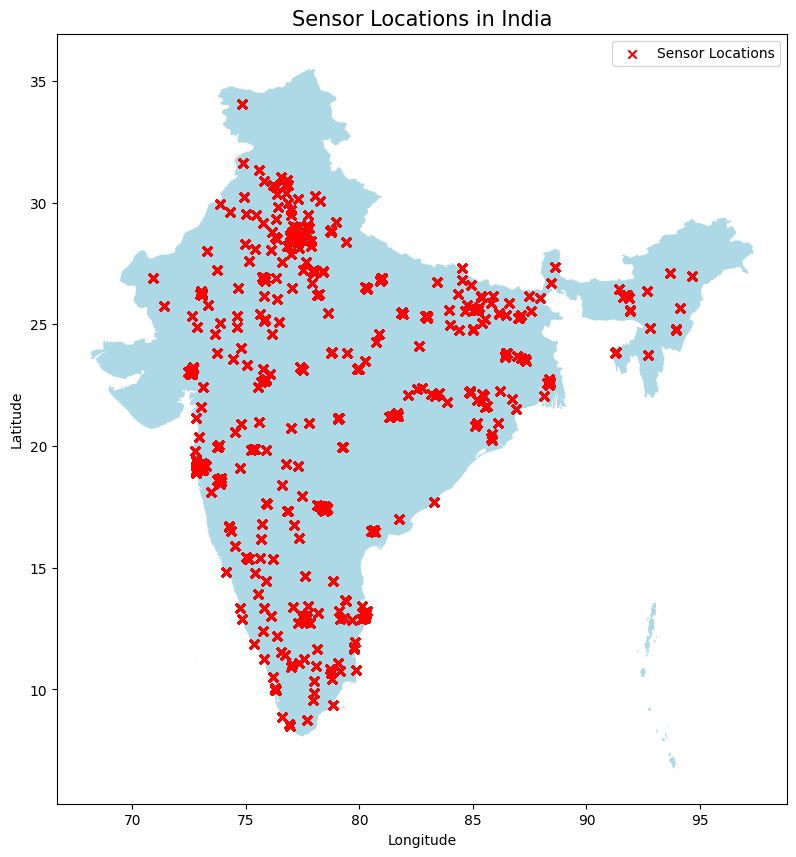

In [29]:
import geopandas as gpd
sensor_locations = df[['latitude', 'longitude']].dropna()
india = gpd.read_file(r"D:\Assignment 3\ne_10m_admin_0_countries")
india = india[india.SOVEREIGNT == "India"]
fig, ax = plt.subplots(figsize=(10, 10))  
india.plot(ax=ax, color='lightblue')
ax.scatter(sensor_locations['longitude'], sensor_locations['latitude'], color='red', marker='x', label='Sensor Locations')
ax.set_title("Sensor Locations in India", fontsize=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
ax.plot()

Q. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. 

1.An interesting insight could come from the regional variations in pollutant sources. By comparing the pollutant across different states or cities, we could identify which pollutants are most prevalent in certain areas. This could help policymakers in developing targeted measures based on the specific pollutants contributing the most to poor air quality.  
2. One intriguing insight from the dataset is the stark variation in air quality between urban and rural monitoring stations. While cities show consistently high PM2.5 levels, some rural areas also exhibit unexpected pollution spikes, possibly due to localized industrial activities, biomass burning, or seasonal factors like stubble burning. Additionally, despite NCAP funding increments, certain states show minimal improvement, suggesting inefficiencies in fund utilization or the need for stricter implementation. These findings highlight the need for region-specific policies rather than a one-size-fits-all approach to tackling air pollution.